# Working with the theoretical ACF in strong scintillation

### Derived in Lambert & Rickett (1999) and Rickett et al. (2014)

Code adapted from original MATLAB function developed in collaboration with Bill Coles (UCSD)

In [1]:
# Import theoretical ACF code
from scintools.scint_sim import ACF

First, let's just create an instance using default parameters, to plot the results

In [2]:
acf_obj = ACF()

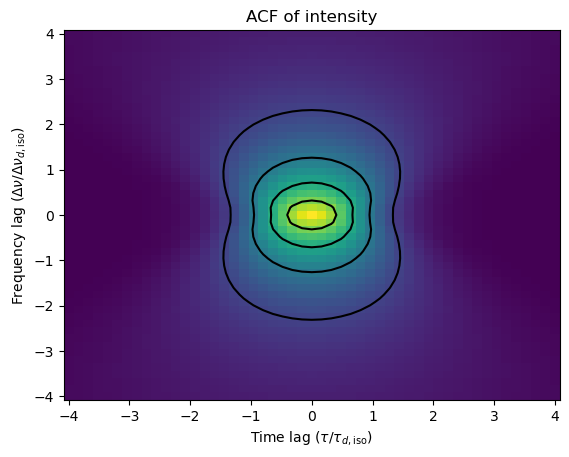

In [3]:
# Plot the ACF
acf_obj.plot_acf()

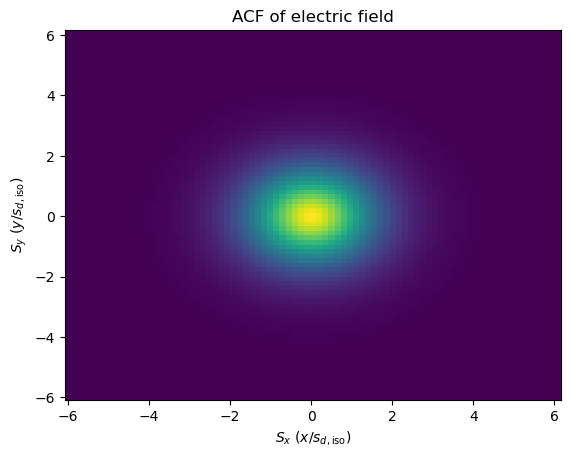

In [4]:
# Plot the ACF of the electric field
acf_obj.plot_acf_efield()

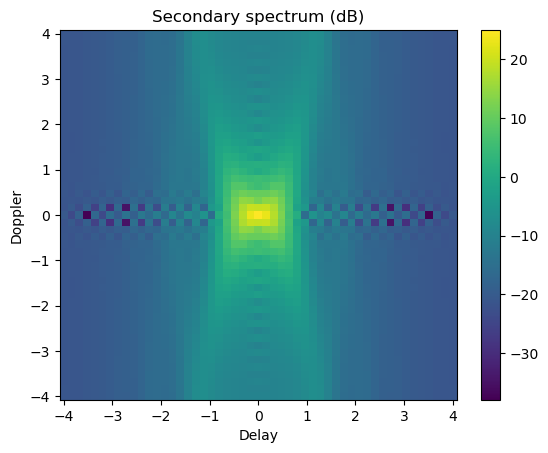

In [5]:
# Plot the secondary spectrum
acf_obj.plot_sspec()

Now, let's look at the input variables and then define an ACF with our own parameters. Print their description using the builtin help function

In [6]:
help(ACF.__init__)

Help on function __init__ in module scintools.scint_sim:

__init__(self, psi=0, phasegrad=0, theta=0, ar=1, alpha=1.6666666666666667, taumax=4, dnumax=4, nf=51, nt=51, amp=1, wn=0, spatial_factor=2, resolution_factor=1, core_factor=2, auto_sampling=True, plot=False, display=True)
    Generate an ACF from the theoretical function in:
        Rickett et al. (2014)
    
    Magnitude of velocity defined to be 1
    
    psi - angle of velocity w.r.t the major axis of (brightness) anisotropy
    phasegrad - magnitude of phase gradient
    theta - angle of phase gradient w.r.t velocity vector
    ar - axial ratio of anisotropy
    alpha - structure function exponent (Kolmogorov = 5/3)
    taumax - number of time scales to calculate ACF to
        (ACF in space goes to taumax*V)
    dnumax - number of frequency scales to calculate ACF to
    nf - size of ACF in frequency. If not odd, returns nf+1
    nt - size of ACF in frequency. If not odd, returns nt+1
    amp - amplitude of ACF
    wn - 

The major axis of anisotropy defines the x-direction, and the timescale is the spatial scale because the magnitude of velocity is defined to be one.

Some key parameters we might want to change are below:

In [7]:
ar = 2  # axial ratio of anisotropy
psi = 30  # angle of velocity relative to major axis (defined as x)
phasegrad = 0.2  # magnitude of phase gradient
theta = 0  # angle of phase gradient relative to velocity

taumax = 4  # number of scintillation timescale to compute to
dnumax = 4  # number of scintillation timescale to compute to
nt = 51  # number of time samples in the ACF
nf = 51  # number of frequency samples in the ACF

auto_sampling = True # choose to dynamically set the spatial properties to try to avoid arefacts in the ACF

Note that while we set nt and nf here, the size and resolution of the spatial scale for the computation is adjusted "under the hood" to try to avoid arefacts in the resulting ACF.

Let's compute and plot the result!

In [8]:
my_acf = ACF(psi=psi, phasegrad=phasegrad, theta=theta, ar=ar,
             taumax=taumax, dnumax=dnumax, nt=nt, nf=nf)

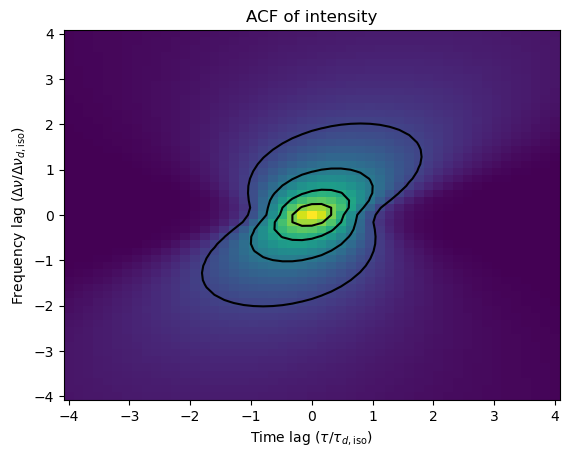

In [9]:
# Plot the ACF
my_acf.plot_acf()

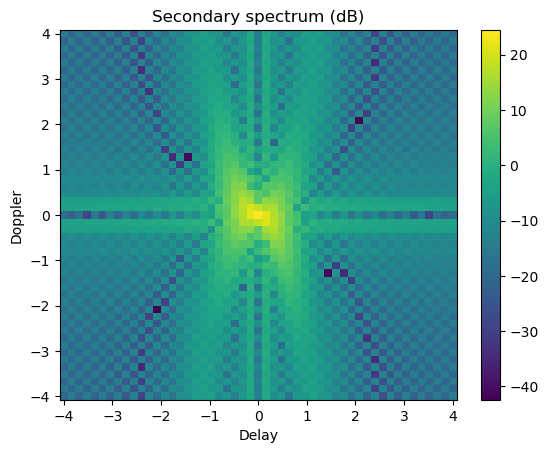

In [10]:
# Plot the secondary spectrum
my_acf.plot_sspec()

If you want to take the model acf to work with yourself, you can extract simple numpy arrays with

In [11]:
acf = my_acf.acf
t = my_acf.tn
f = my_acf.fn

And plot for example with

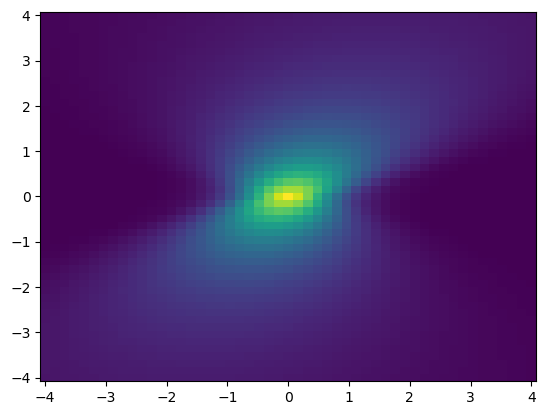

In [12]:
import matplotlib.pyplot as plt
plt.pcolormesh(t, f, acf, shading='auto')
plt.show()